# Prepare submission

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import os
import sys
sys.path.insert(0,'..')
from src.models.model import HistoricalMedian,XGBoost,LinearModel,RF,KNN,SVM,mase

Using TensorFlow backend.


# KNN

,rougher.output.recovery,final.output.recovery
date,,
2016-09-01T00:59:59Z,89.034184,68.969238
2016-09-01T01:59:59Z,89.172338,70.980992
2016-09-01T02:59:59Z,89.172338,70.980992
2016-09-01T03:59:59Z,89.278053,70.387288
2016-09-01T04:59:59Z,88.478339,67.328557


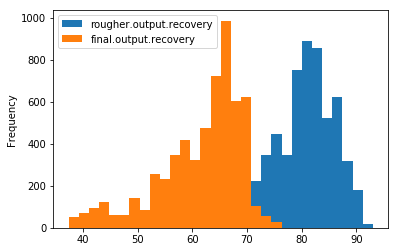

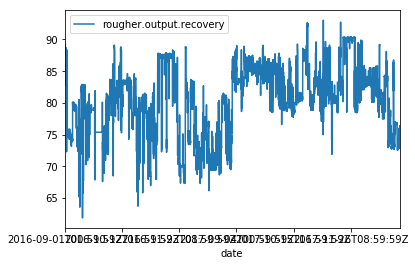

In [9]:
note = '_1'
df_all = []
tgt = ['rougher.output.recovery','final.output.recovery']

for y in [2016,2017]:
    df_a  =pd.read_csv(f'../results/KNN_{tgt[0]}_{y}_{note}.csv',parse_dates = ['date']).set_index('date')
    df_b  =pd.read_csv(f'../results/KNN_{tgt[1]}_{y}_{note}.csv',parse_dates = ['date']).set_index('date')
    df_ab = pd.merge(df_a,df_b,on='date')
    df_all.append(df_ab)
df_all_years  = pd.concat(df_all,axis = 0)
df_all_years = df_all_years.reset_index()
df_all_years['date'] = df_all_years['date'].dt.strftime('%Y-%m-%dT%H:%M:%SZ')
df_all_years.set_index('date',inplace=True)
df_all_years.to_csv(f'../results/KNN_final_{note}.csv')
df_all_years.plot(kind = 'hist',bins = 30)
df_all_years.plot(y='rougher.output.recovery')
df_all_years.head()

# XGBOOST

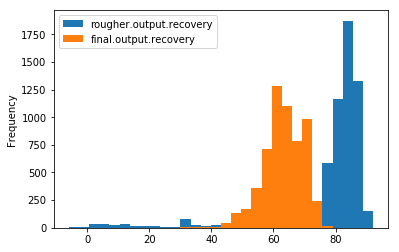

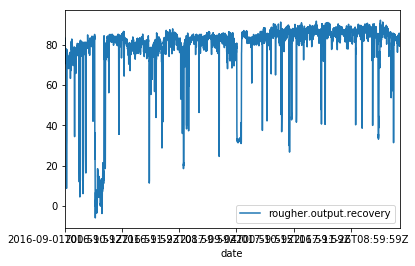

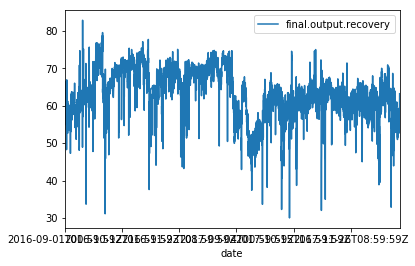

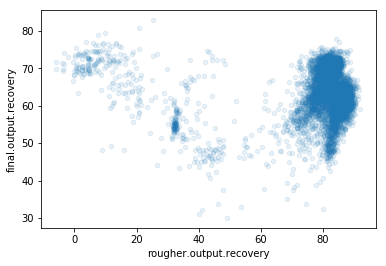

In [8]:
note = '_cv_roll'
df_all = []
tgt = ['rougher.output.recovery','final.output.recovery']
mod = 'xgb'
for y in [2016,2017]:
    df_a  =pd.read_csv(f'../results/{mod}_{tgt[0]}_{y}_{note}.csv',parse_dates = ['date']).set_index('date')
    df_b  =pd.read_csv(f'../results/{mod}_{tgt[1]}_{y}_{note}.csv',parse_dates = ['date']).set_index('date')
    df_ab = pd.merge(df_a,df_b,on='date')
    df_all.append(df_ab)
df_all_years  = pd.concat(df_all,axis = 0)
df_all_years = df_all_years.reset_index()
df_all_years['date'] = df_all_years['date'].dt.strftime('%Y-%m-%dT%H:%M:%SZ')
df_all_years.set_index('date',inplace=True)
df_all_years.to_csv(f'../results/{mod}_final_{note}.csv')
df_all_years.plot(kind = 'hist',bins = 30)
df_all_years.plot(y='rougher.output.recovery')
df_all_years.plot(y='final.output.recovery')
df_all_years.plot(x='rougher.output.recovery',y = 'final.output.recovery',kind='scatter',alpha=0.1)

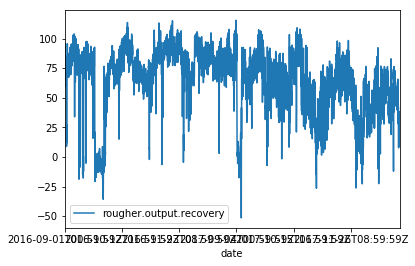

In [37]:
df_all_years.plot(y='rougher.output.recovery')

# QuantileRF, Q=50

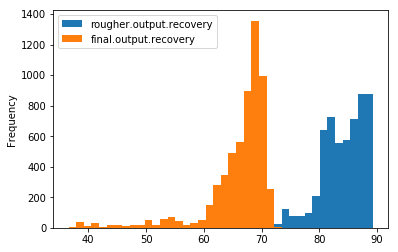

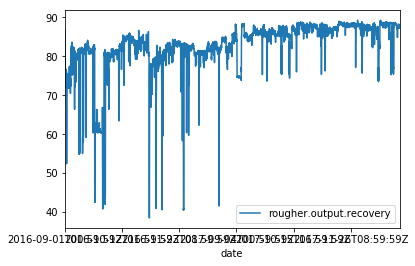

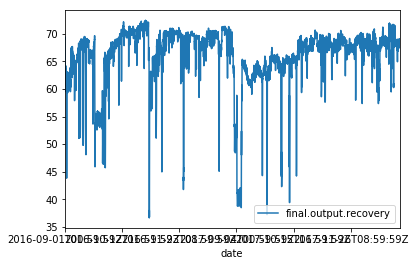

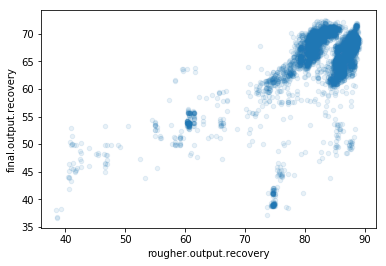

In [45]:
note = '_1'
df_all = []
tgt = ['rougher.output.recovery','final.output.recovery']
mod = 'qrf'
for y in [2016,2017]:
    df_a  =pd.read_csv(f'../results/{mod}_{tgt[0]}_{y}_{note}.csv',parse_dates = ['date']).set_index('date')
    df_b  =pd.read_csv(f'../results/{mod}_{tgt[1]}_{y}_{note}.csv',parse_dates = ['date']).set_index('date')
    df_ab = pd.merge(df_a,df_b,on='date')
    df_all.append(df_ab)
df_all_years  = pd.concat(df_all,axis = 0)
df_all_years = df_all_years.reset_index()
df_all_years['date'] = df_all_years['date'].dt.strftime('%Y-%m-%dT%H:%M:%SZ')
df_all_years.set_index('date',inplace=True)
df_all_years.to_csv(f'../results/{mod}_final_{note}.csv')
df_all_years.plot(kind = 'hist',bins = 40)
df_all_years.plot(y='rougher.output.recovery')
df_all_years.plot(y='final.output.recovery')
df_all_years.plot(x='rougher.output.recovery',y = 'final.output.recovery',kind='scatter',alpha=0.1)

# LM

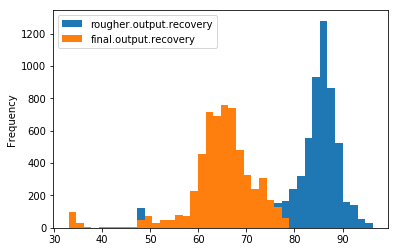

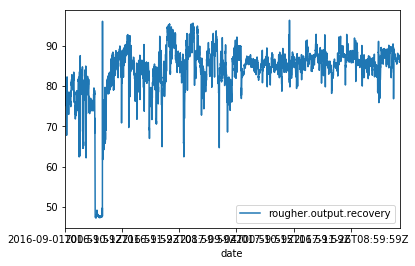

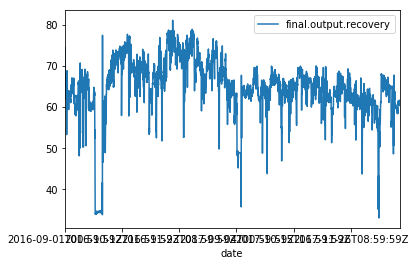

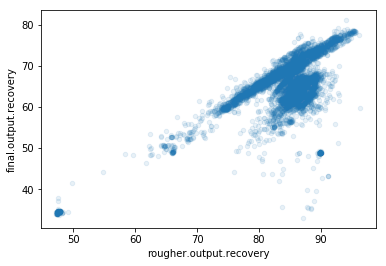

In [6]:
note = '_1'
df_all = []
tgt = ['rougher.output.recovery','final.output.recovery']
mod = 'LM'
for y in [2016,2017]:
    df_a  =pd.read_csv(f'../results/{mod}_{tgt[0]}_{y}_{note}.csv',parse_dates = ['date']).set_index('date')
    df_b  =pd.read_csv(f'../results/{mod}_{tgt[1]}_{y}_{note}.csv',parse_dates = ['date']).set_index('date')
    df_ab = pd.merge(df_a,df_b,on='date')
    df_all.append(df_ab)
df_all_years  = pd.concat(df_all,axis = 0)
df_all_years = df_all_years.reset_index()
df_all_years['date'] = df_all_years['date'].dt.strftime('%Y-%m-%dT%H:%M:%SZ')
df_all_years.set_index('date',inplace=True)
df_all_years.to_csv(f'../results/{mod}_final_{note}.csv')
df_all_years.plot(kind = 'hist',bins = 40)
df_all_years.plot(y='rougher.output.recovery')
df_all_years.plot(y='final.output.recovery')
df_all_years.plot(x='rougher.output.recovery',y = 'final.output.recovery',kind='scatter',alpha=0.1)

# STACK + QRF

In [18]:
df_qf = pd.read_csv(f'../results/qrf_final_best.csv',parse_dates = ['date']).set_index('date').rolling(window = 12,min_periods = 1,center=True).median()
df_stack = pd.read_csv(f'../results/stacked_sub_1.csv',parse_dates = ['date']).set_index('date').rolling(window = 12,min_periods = 1,center=True).median()

averaged = df_stack*0.5 + df_qf*0.5
averaged = averaged.reset_index()
averaged['date'] = averaged['date'].dt.strftime('%Y-%m-%dT%H:%M:%SZ')
averaged.set_index('date',inplace=True)
averaged.to_csv(f'../results/qrf_stack_equal.csv')
averaged

,rougher.output.recovery,final.output.recovery
date,,
2016-09-01T00:59:59Z,88.275873,69.914341
2016-09-01T01:59:59Z,88.233700,69.830835
2016-09-01T02:59:59Z,87.634113,69.120338
2016-09-01T03:59:59Z,87.034527,68.409841
2016-09-01T04:59:59Z,85.643326,67.802795
2016-09-01T05:59:59Z,84.252126,67.195748
2016-09-01T06:59:59Z,82.241475,66.297259
2016-09-01T07:59:59Z,79.689216,64.639203
2016-09-01T08:59:59Z,79.080166,63.989002


# Stack +Stack BCOX

In [13]:
import pandas as pd
df_qf = pd.read_csv(f'../results/stacked_sub_bcox.csv',parse_dates = ['date']).set_index('date')
df_stack_ts = pd.read_csv(f'../results/stacked_sub_3.csv',parse_dates = ['date']).set_index('date')

averaged = df_stack*0.5 + df_qf*0.5

averaged = averaged.reset_index()
averaged['date'] = averaged['date'].dt.strftime('%Y-%m-%dT%H:%M:%SZ')
averaged.set_index('date',inplace=True)
# Fill NA that came from boxcox
for c in averaged.columns:
    ids = averaged[c].isna()
    averaged.loc[ids,c] = df_stack_ts.loc[ids,c]
averaged.to_csv(f'../results/stack_equal_3_bcox.csv')


rougher.output.recovery    0
final.output.recovery      0
dtype: int64

,rougher.output.recovery,final.output.recovery
date,,
2016-09-01T00:59:59Z,89.167609,67.180251
2016-09-01T01:59:59Z,89.897394,68.125103
2016-09-01T02:59:59Z,89.844645,67.857222
2016-09-01T03:59:59Z,90.632541,69.061478
2016-09-01T04:59:59Z,88.544632,66.999333
2016-09-01T05:59:59Z,84.410944,63.756678
2016-09-01T06:59:59Z,82.434860,61.628067
2016-09-01T07:59:59Z,82.464830,60.310001
2016-09-01T08:59:59Z,82.324946,60.199303
